<a href="https://colab.research.google.com/github/johnjar99/curso_python-/blob/main/ej_mainfifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laudy Pan Perez - John Narvaez Galviz 

# Ejemplo completo para un problema de regresión usando sci-kitlearn

El siguiente ejemplo presenta las etapas básicas de un proyecto de analítica de datos en una tarea de regresión, orientadas a:

- Preproceso de atributos con campos vacios y tipo texto.
- Entrenamiento y selección de un modelo de regresión bajo una estrategia de validación cruzada.
- La utilización de diccionarios para la sintonización de hiperparámetros.
-Se ilustra también la creación de clases (objetos) propios compatibles con la clase pipeline de sci-kitlearn.

**Base de datos utilizada**: [FIFA 2019 - Kaggle](https://www.kaggle.com/karangadiya/fifa19).

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "15QxsIm_jMfHEy6Y--6o19IWgr66oiTRe"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2022-11-02 21:01:53--  https://docs.google.com/uc?export=download&confirm=t&id=15QxsIm_jMfHEy6Y--6o19IWgr66oiTRe
Resolving docs.google.com (docs.google.com)... 142.251.163.100, 142.251.163.138, 142.251.163.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jmloqoq4o8rfj989352d644kgib44uo4/1667422875000/09173029842254050324/*/15QxsIm_jMfHEy6Y--6o19IWgr66oiTRe?e=download&uuid=a555aeea-6701-4675-8384-743b0ab70782 [following]
--2022-11-02 21:02:21--  https://doc-0o-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jmloqoq4o8rfj989352d644kgib44uo4/1667422875000/09173029842254050324/*/15QxsIm_jMfHEy6Y--6o19IWgr66oiTRe?e=download&uuid=a555aeea-6701-4675-8384-743b0ab70782
Resolving doc-0o-0s-docs.googleusercontent.com (doc-0o-0s-docs.googleusercontent.com)... 142.251.163.

# Lectura de la base de datos con Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#librerias para proceso
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

%matplotlib inline
csv_path = 'Main_Fifa/datos/data.csv' #directorio de la base de datos en disco de colaboratory según archivo cargado

Xdata = pd.read_csv(csv_path)#leer archivo csv

col_drop = ['Unnamed: 0', 'Name','ID','Photo','Flag',
           'Club Logo','Loaned From'] #variables a descartar - no contienen información relevante
Xdata.drop(columns = col_drop, inplace = True)
Xdata.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Identificar tipos de variables, campos perdidos y preproceso básico a realizar

In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  Real F

## Se presentan atributos tipo int, float y texto, algunos de ellos con datos perdidos.

# Partición en conjunto de training y testing.

## Tips básicos para escoger la estrategia de validación:

- Para $N\geq 5000$ se sugiere realizar entrenamiento hold-out, generando grupos de entrenamiento, validación y evaluación. Los conjuntos de entrenamiento y validación se pueden utilizar para realizar validación cruzada de 10 o 5 folds para determinar el mejor modelo y sus hiperparámetros. No obstante, si la cantidad de datos es muy grande, generalmente se utiliza un único conjunto de entrenamiento y un único conjunto de validación, e.g., modelos de deep learning generalmente utilizan esta estrategia por la gran cantidad de datos disponible.

**HoldOut con única partición de entrenamiento, validación y evaluación (training, validation, testing)**

![HoldOut](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/HoldOut.png?raw=1)


**HoldOut utilizando validación cruzada para definir varios conjuntos de entrenamiento y validación en la búsqueda del mejor modelo con evaluación final en un único conjunto de testing**

![grid_search_cross_validation](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/grid_search_cross_validation.png?raw=1)

- Se sugiere para $ 30 <N <5000$ realizar validación cruzada o validación cruzada anidad k folds (generalmente se trabaja con k=10 o k = 5), y reportar el desempeño promedio en el conjunto de test a lo largo de las rotaciones. En algunos textos, dado que se los datos se rotan y aparecen al menos una vez en el conjunto de training y una vez en el de testing, se habla solamente de conjuntos de entrenamiento y validación, porque el concepto de datos afuera (testing) se pierde.

![kfolds](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/kfolds.png?raw=1)

- La validación cruzada anidad es mucho más estricta a la hora de dejar un conjunto de test que no se utiliza para sintonizar los hiperparámetros (a diferencia del kfolds convencional que determina los mejores valores de hiperparametros respecto al conjunto de validación=evaluación). Sin embargo, la extensión anidad es más costosa computacionalmente.


![nestedcv](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_Regresion/nestedcv.png?raw=1)

- Para $N \leq 30$ se sugiere trabajar con validación cruzada fijando el número de particiones igual al número de datos ($k=N$). En este caso, se tiene un conjunto de entrenamiento de $N-1$ y una única muestra de test que se rota $N$ veces (leave-one-out).



**Nota**: En este caso se cuenta con una buena cantidad de datos 18.000 aprox., por lo que se realizará una validación hold-out, con 70% de datos para entrenamiento y 30% para evaluación. Sobre el conjunto de entrenamiento se realizará una validación cruzada de 5 folds (k=5) para determinar el mejor modelo e hiperparámetros. 

Se define el atributo Release Clause como salida.

In [ ]:
# Partición entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal = "Release Clause"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


**Nota**: Recuerde que puede usar la partición estratificada para preservar la distribución de la salida de interés en los folds

# Preproceso: completar datos y codificar datos tipo texto


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#se utiliza estimador de moda
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)).reshape(-1)#ajuste sobre la salida
ytest = imputer.transform(pd.DataFrame(ytest)).reshape(-1)#evaluar sobre datos de test

print(ytrain.shape, ytest.shape)

(12744,) (5463,)


**Nota**: Dado que la variable de salida esta en formato moneda se debe codificar meidante función particular (custom). También, se creará una función para codificar las variables tipo evolución características del jugador.

---



In [ ]:
ytrain[0]

'€249K'

In [ ]:
 #codificar variables moneda
def code_euro(y):
    yc = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        if y[i][-1]=='M': yc[i] = float(y[i][1:-1])*10**6 #buscar M y reemplazar 10^6
        elif y[i][-1]=='K': yc[i] = float(y[i][1:-1])*10**3 # buscar K y reemplazar por 10^3
        else: yc[i] = float(y[i][1:])
    return yc 

#codificar estadísticas
def code_stats(y):
    yc = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        if y.iloc[i].find("+") > -1: # encontrar signo + en str y casteo a flotante
            yc[i] = float(y.iloc[i][:y.iloc[i].find("+")])+float(y.iloc[i][y.iloc[i].find("+")+1:])
        else: yc[i] = float(y.iloc[i])
    return yc   

In [ ]:
#codificar salida
ytrain_num = code_euro(ytrain)
ytest_num = code_euro(ytest)

In [ ]:
ytrain_num[:5]

array([  249000., 10900000.,  1700000.,  1300000.,   827000.])

## Se definen las variables para codificar utilizando las funciones establecidas de moneda, estadísticas y las tipo texto con OrdinalEncoder y OneHotEncoder.

In [ ]:
#definir columnas tipo string  para codificar moneda, estadistica fifa y categoricas
col_euro = ['Value','Wage'] #variables tipo moneda
col_stats = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM',
             'CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']#variables tipo mejora jugadores

cat = ['Nationality','Club','Body Type','Position','Preferred Foot',
        'Work Rate','Real Face','Contract Valid Until']#variables a codificar OrdinalEncoder y OneHotEncoder
items = [] 
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))#se crean diccionarios con las variables y sus posibles valores

In [ ]:
Xdata['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [ ]:
cat_usr.keys()

dict_keys(['Nationality', 'Club', 'Body Type', 'Position', 'Preferred Foot', 'Work Rate', 'Real Face', 'Contract Valid Until'])

In [ ]:
cat_usr['Body Type']

['Normal',
 'Lean',
 'Stocky',
 'Messi',
 'C. Ronaldo',
 'Neymar',
 'Courtois',
 'PLAYER_BODY_TYPE_25',
 'Shaqiri',
 'Akinfenwa']

# Se crea clase propia (custom) para ejecutar el preproceso que sea compatible con scikitlearn

In [ ]:
#%% transformer custom
from sklearn.base import BaseEstimator, TransformerMixin #objetos básicos para herencia de clase

class mypre_fifa(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_euro,col_stats, cat_usr): #constructor clase
        self.col_euro = col_euro #lista atributos tipo moneda
        self.col_stats = col_stats #lista atributos tipo estadistica
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):#función de ajuste -> *_ para indicar que puede recibir más entradas en el pipeline
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo moda
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar datos con el imputador
        
        for i in self.col_euro: #codificar tipo moneda
            Xi[i] = code_euro(np.array(Xi[i]))
        
        for i in self.col_stats: #codificar datos estadisticos
            Xi[i] = code_stats(Xi[i])
        
        #height, wieght corregir formato
        Xi['Height'].replace(regex=["'"], value='.',inplace=True) #reemplaza unidad ' con .       
        for i in Xi.index:
            Xi.loc[i,'Weight'] = float(Xi.loc[i,'Weight'][:-3])#elimnar unidades 
            Xi.loc[i,'Height'] = float(Xi.loc[i,'Height'])#eliminar unidades
        
        Xi['Height'] = Xi['Height'].astype('float64')
        Xi['Weight'] = Xi['Weight'].astype('float64')#asegurar formato flotante
        
        Xi['Joined'] = Xi['Joined'].replace(regex="/",value="")#codificar fecha
        Xi['Joined'] = Xi['Joined'].astype('float64')
        
        cat = [] #codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat) # OneHotEncoder(categories=cat,sparse=False)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])
        #si utilizar OneHotEncoder debe concatenar las columnas resultantes -> ver cuaderno guia lado a lado
        
        return self    

    def transform(self, X, *_):#funcion transformador-> pensando en datos nuevos
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        
        for i in self.col_euro:
            Xi[i] = code_euro(np.array(Xi[i]))
        for i in self.col_stats:
            Xi[i] = code_stats(Xi[i])
        
                #height, wieght
        Xi['Height'].replace(regex=["'"], value='.',inplace=True)        
        for i in Xi.index:
            Xi.loc[i,'Weight'] = float(Xi.loc[i,'Weight'][:-3])
            Xi.loc[i,'Height'] = float(Xi.loc[i,'Height'])
        
        Xi['Height'] = Xi['Height'].astype('float64')
        Xi['Weight'] = Xi['Weight'].astype('float64')
            
        Xi['Joined'] = Xi['Joined'].replace(regex="/",value="")
        Xi['Joined'] = Xi['Joined'].astype('float64')
        
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        return Xi
    
    def fit_transform(self,X,*_):#ajustar y transformar en cascada
        self.fit(X)
        return self.transform(X)

In [ ]:
mypre = mypre_fifa(col_euro=col_euro,col_stats=col_stats,cat_usr = cat_usr)
Xtrain_pre = mypre.fit_transform(Xtrain)

**Nota**: Recuerde que ninguna etapa del proceso puede utilizar los datos de test para sintonizar parámetros.

In [ ]:
Xtest_pre = mypre.transform(Xtest) #no se puede fit solo transform-> parámetros ajustados sobre Xtrain

In [ ]:
Xtrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12744 entries, 17649 to 9646
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12744 non-null  int64  
 1   Nationality               12744 non-null  float64
 2   Overall                   12744 non-null  int64  
 3   Potential                 12744 non-null  int64  
 4   Club                      12744 non-null  float64
 5   Value                     12744 non-null  float64
 6   Wage                      12744 non-null  float64
 7   Special                   12744 non-null  int64  
 8   Preferred Foot            12744 non-null  float64
 9   International Reputation  12744 non-null  object 
 10  Weak Foot                 12744 non-null  object 
 11  Skill Moves               12744 non-null  object 
 12  Work Rate                 12744 non-null  float64
 13  Body Type                 12744 non-null  float64
 14  Rea

Las variables fueron codificadas $X_{train}\in\mathbb{R}^{N \times P}$

# Se realiza análisis exploratorio básico

In [ ]:
corr_matrix = Xtrain_pre.corr()#matriz de correlación
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
Age,1.000000,0.024256,0.448960,-0.253873,0.023257,0.071611,0.138432,0.236405,0.002403,0.114024,-0.075364,0.154253,0.063936,0.033888,-0.083258,0.055895,0.228184,0.269051,0.269051,0.269051,0.190199,0.220023,0.220023,0.220023,0.190199,0.225758,0.225758,0.225758,0.209353,0.328171,0.328171,0.328171,0.209353,0.302187,0.349550,0.349550,0.349550,0.302187,0.288773,0.314640,0.314640,0.314640,0.288773
Nationality,0.024256,1.000000,0.032600,-0.015044,0.042004,-0.020481,-0.036902,0.050579,-0.007716,0.035389,-0.001211,-0.034909,0.015661,0.019898,-0.035074,0.010151,0.029473,0.053364,0.053364,0.053364,0.040093,0.043402,0.043402,0.043402,0.040093,0.036983,0.036983,0.036983,0.038259,0.019466,0.019466,0.019466,0.038259,-0.011624,-0.020477,-0.020477,-0.020477,-0.011624,-0.017371,-0.023847,-0.023847,-0.023847,-0.017371
Overall,0.448960,0.032600,1.000000,0.663368,-0.191696,0.624138,0.568481,0.607098,0.048409,0.140151,-0.002790,0.403522,0.192282,0.037643,0.069431,0.031559,0.140832,0.608796,0.608796,0.608796,0.558165,0.581904,0.581904,0.581904,0.558165,0.608849,0.608849,0.608849,0.613748,0.718760,0.718760,0.718760,0.613748,0.570798,0.545678,0.545678,0.545678,0.570798,0.506150,0.398862,0.398862,0.398862,0.506150
Potential,-0.253873,-0.015044,0.663368,1.000000,-0.234571,0.574682,0.483634,0.385030,0.038901,0.050914,0.059805,0.321567,0.122662,0.020782,0.125857,0.003675,-0.016088,0.396175,0.396175,0.396175,0.398918,0.407384,0.407384,0.407384,0.398918,0.429582,0.429582,0.429582,0.432920,0.466172,0.466172,0.466172,0.432920,0.334922,0.294952,0.294952,0.294952,0.334922,0.286182,0.179117,0.179117,0.179117,0.286182
Club,0.023257,0.042004,-0.191696,-0.234571,1.000000,-0.161770,-0.204479,-0.095404,-0.011616,-0.022870,-0.015802,-0.234968,0.028125,-0.016681,-0.003675,0.001017,0.023051,-0.111145,-0.111145,-0.111145,-0.106762,-0.111005,-0.111005,-0.111005,-0.106762,-0.116018,-0.116018,-0.116018,-0.113660,-0.132076,-0.132076,-0.132076,-0.113660,-0.107501,-0.103627,-0.103627,-0.103627,-0.107501,-0.098412,-0.077860,-0.077860,-0.077860,-0.098412
Value,0.071611,-0.020481,0.624138,0.574682,-0.161770,1.000000,0.859244,0.376335,0.022294,0.061274,0.054565,0.444740,0.123779,0.023656,0.104598,0.008968,0.033730,0.437983,0.437983,0.437983,0.418131,0.432433,0.432433,0.432433,0.418131,0.445965,0.445965,0.445965,0.446633,0.479557,0.479557,0.479557,0.446633,0.332662,0.299449,0.299449,0.299449,0.332662,0.280156,0.184438,0.184438,0.184438,0.280156
Wage,0.138432,-0.036902,0.568481,0.483634,-0.204479,0.859244,1.000000,0.345840,0.018901,0.061132,0.045106,0.495996,0.092473,0.021435,0.078681,0.015925,0.054112,0.388702,0.388702,0.388702,0.365339,0.379226,0.379226,0.379226,0.365339,0.391757,0.391757,0.391757,0.391845,0.434960,0.434960,0.434960,0.391845,0.323422,0.298237,0.298237,0.298237,0.323422,0.280708,0.204072,0.204072,0.204072,0.280708
Special,0.236405,0.050579,0.607098,0.385030,-0.095404,0.376335,0.345840,1.000000,0.130245,0.188382,0.035533,0.249091,0.390232,0.032787,0.046820,-0.298852,-0.277518,0.458898,0.458898,0.458898,0.468036,0.457271,0.457271,0.457271,0.468036,0.536924,0.536924,0.536924,0.564651,0.647031,0.647031,0.647031,0.564651,0.400704,0.310845,0.310845,0.310845,0.400704,0.312340,0.137090,0.137090,0.137090,0.312340
Preferred Foot,0.002403,-0.007716,0.048409,0.038901,-0.011616,0.022294,0.018901,0.130245,1.000000,-0.005738,0.022023,0.021642,0.041134,-0.008928,0.007263,-0.049583,-0.072751,-0.007848,-0.007848,-0.007848,0.045913,0.015928,0.015928,0.015928,0.045913,0.032619,0.032619,0.032619,0.065384,0.053027,0.053027,0.053027,0.065384,0.091610,0.039330,0.039330,0.039330,0.091610,0.078099,0.022543,0.022543,0.022543,0.078099
Work Rate,0.114024,0.035389,0.140151,0.050914,-0.022870,0.061274,0.061132,0.188382,-0.005738,1.000000,0.036707,0.046165,

# Ejercicio 1:

1. Qué puede discutir sobre las correlaciones cálculadas?
#Respuesta
En el diagrama de correlacion podemos observar la alta correlacion que existe entre los puntajes de cada jugador respecto a su posicion, es una de las variabels mas influyentes en todo el analisis y una de las mas correlaciones, se debe tener en cueta el puntaje por posisicon de cada jugador para poder atrivuir la clausula del jugador, la cual es nuestra variable de salida. 
- En la anterior tabla de correlaciones se observa que las variables de "Age" y "Nationality" no tienen ninguna correlación con ninguno de los otros atributos. \\
- Observemos que el atributo del "club"  no tiene correlación con ningún otro atributo, en especial con el salario de cada jugador.Pues los clubs famosos son aquellos en donde se paga mejor. \\
- En cuanto a los atributos de "Value", "Wage", "Potential" y "Overall" se ve que existe una correlación considerable entre sí, y es de esperarse ya que son características que en este caso por defecto van de la mano. \\
2. Cuáles son los atributos que presentan una relación lineal más fuerte con la variable de salida?
Se puede observar que las variables que más correlación tienen con la salida "Release Clause" (variable a predecir) son: \\

- Value (valorización).
- Wage (salario). \\

Los atributos mas influyentes en la variable de salida es el valor de cada jugador en el mercado, el cual esta directamente influenciado por el valor por posicion de cada jugador, estos puntajes tienen una muy alta correlacion por posicion entre si y entre mas altos mas valor tiene cada jugador y por ende mas clausula

In [ ]:
Xtrain_pre3 = Xtrain_pre.copy()
Xtrain_pre3['Salida'] = ytrain_num  #Se agrega la variable de salida a la matriz de datos
corr_matrix3 = Xtrain_pre3.corr()# es la matriz de correlación

CorrOut=pd.DataFrame(corr_matrix3["Salida"].sort_values(ascending=False)) # se orgniza las correlaciones de forma descendente con respecto a la variable a predecir
CorrOut.style.background_gradient(cmap='coolwarm')


,Salida
Salida,1.000000
Value,0.966534
Wage,0.820805
Overall,0.590004
Potential,0.550496
RCM,0.452205
CM,0.452205
LCM,0.452205
Real Face,0.428649
RM,0.420227


# Ejercicio 2:

Sobre los datos preprocesados de entrenamiento presente las gráficas de histograma, dispersión (scatter matrix) y diagramas de caja para la salida y al menos tres atirbutos de entrada, teniendo en cuenta: i) datos preprocesados, ii) datos preprocesados más StandardScaler, iii) datos preprocesados más MinMaxScaler.

**Nota**: se presentan algunas líneas de código de ayuda.

In [ ]:
Xtrain_pre.columns #atributos disponibles

Index(['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
 

In [ ]:
Xm =pd.DataFrame(Xtrain_pre[['Age','Overall','Potential']],columns=['Age','Overall','Potential'])#definir pandas con atributos seleccionados
Xm['Output'] = ytrain_num #agregar salida

Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['output'] = ytrain_num
corr_matrix2 = Xtrain_pre2.corr()#matriz de correlación
corr_matrix2.style.background_gradient(cmap='coolwarm')




,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,output
Age,1.000000,0.024256,0.448960,-0.253873,0.023257,0.071611,0.138432,0.236405,0.002403,0.114024,-0.075364,0.154253,0.063936,0.033888,-0.083258,0.055895,0.228184,0.269051,0.269051,0.269051,0.190199,0.220023,0.220023,0.220023,0.190199,0.225758,0.225758,0.225758,0.209353,0.328171,0.328171,0.328171,0.209353,0.302187,0.349550,0.349550,0.349550,0.302187,0.288773,0.314640,0.314640,0.314640,0.288773,0.061950
Nationality,0.024256,1.000000,0.032600,-0.015044,0.042004,-0.020481,-0.036902,0.050579,-0.007716,0.035389,-0.001211,-0.034909,0.015661,0.019898,-0.035074,0.010151,0.029473,0.053364,0.053364,0.053364,0.040093,0.043402,0.043402,0.043402,0.040093,0.036983,0.036983,0.036983,0.038259,0.019466,0.019466,0.019466,0.038259,-0.011624,-0.020477,-0.020477,-0.020477,-0.011624,-0.017371,-0.023847,-0.023847,-0.023847,-0.017371,-0.014453
Overall,0.448960,0.032600,1.000000,0.663368,-0.191696,0.624138,0.568481,0.607098,0.048409,0.140151,-0.002790,0.403522,0.192282,0.037643,0.069431,0.031559,0.140832,0.608796,0.608796,0.608796,0.558165,0.581904,0.581904,0.581904,0.558165,0.608849,0.608849,0.608849,0.613748,0.718760,0.718760,0.718760,0.613748,0.570798,0.545678,0.545678,0.545678,0.570798,0.506150,0.398862,0.398862,0.398862,0.506150,0.590004
Potential,-0.253873,-0.015044,0.663368,1.000000,-0.234571,0.574682,0.483634,0.385030,0.038901,0.050914,0.059805,0.321567,0.122662,0.020782,0.125857,0.003675,-0.016088,0.396175,0.396175,0.396175,0.398918,0.407384,0.407384,0.407384,0.398918,0.429582,0.429582,0.429582,0.432920,0.466172,0.466172,0.466172,0.432920,0.334922,0.294952,0.294952,0.294952,0.334922,0.286182,0.179117,0.179117,0.179117,0.286182,0.550496
Club,0.023257,0.042004,-0.191696,-0.234571,1.000000,-0.161770,-0.204479,-0.095404,-0.011616,-0.022870,-0.015802,-0.234968,0.028125,-0.016681,-0.003675,0.001017,0.023051,-0.111145,-0.111145,-0.111145,-0.106762,-0.111005,-0.111005,-0.111005,-0.106762,-0.116018,-0.116018,-0.116018,-0.113660,-0.132076,-0.132076,-0.132076,-0.113660,-0.107501,-0.103627,-0.103627,-0.103627,-0.107501,-0.098412,-0.077860,-0.077860,-0.077860,-0.098412,-0.170418
Value,0.071611,-0.020481,0.624138,0.574682,-0.161770,1.000000,0.859244,0.376335,0.022294,0.061274,0.054565,0.444740,0.123779,0.023656,0.104598,0.008968,0.033730,0.437983,0.437983,0.437983,0.418131,0.432433,0.432433,0.432433,0.418131,0.445965,0.445965,0.445965,0.446633,0.479557,0.479557,0.479557,0.446633,0.332662,0.299449,0.299449,0.299449,0.332662,0.280156,0.184438,0.184438,0.184438,0.280156,0.966534
Wage,0.138432,-0.036902,0.568481,0.483634,-0.204479,0.859244,1.000000,0.345840,0.018901,0.061132,0.045106,0.495996,0.092473,0.021435,0.078681,0.015925,0.054112,0.388702,0.388702,0.388702,0.365339,0.379226,0.379226,0.379226,0.365339,0.391757,0.391757,0.391757,0.391845,0.434960,0.434960,0.434960,0.391845,0.323422,0.298237,0.298237,0.298237,0.323422,0.280708,0.204072,0.204072,0.204072,0.280708,0.820805
Special,0.236405,0.050579,0.607098,0.385030,-0.095404,0.376335,0.345840,1.000000,0.130245,0.188382,0.035533,0.249091,0.390232,0.032787,0.046820,-0.298852,-0.277518,0.458898,0.458898,0.458898,0.468036,0.457271,0.457271,0.457271,0.468036,0.536924,0.536924,0.536924,0.564651,0.647031,0.647031,0.647031,0.564651,0.400704,0.310845,0.310845,0.310845,0.400704,0.312340,0.137090,0.137090,0.137090,0.312340,0.353374
Preferred Foot,0.002403,-0.007716,0.048409,0.038901,-0.011616,0.022294,0.018901,0.130245,1.000000,-0.005738,0.022023,0.021642,0.041134,-0.008928,0.007263,-0.049583,-0.072751,-0.007848,-0.007848,-0.007848,0.045913,0.015928,0.015928,0.015928,0.045913,0.032619,0.032619,0.032619,0.065384,0.053027,0.053027,0.053027,0.065384,0.091610,0.039330,0.039330,0.039330,0.091610,0.078099,0.022543,0.022543,0.022543,0.078099,0.019652
Work Rate,0.114024,0.035389,0.

In [ ]:
abs(corr_matrix2["output"]).sort_values(ascending=False)

output                  1.000000
Value                   0.966534
Wage                    0.820805
Overall                 0.590004
Potential               0.550496
RCM                     0.452205
CM                      0.452205
LCM                     0.452205
Real Face               0.428649
RM                      0.420227
LM                      0.420227
RAM                     0.418437
CAM                     0.418437
LAM                     0.418437
RS                      0.408849
LS                      0.408849
ST                      0.408849
RF                      0.405420
LF                      0.405420
CF                      0.405420
LW                      0.392420
RW                      0.392420
Special                 0.353374
LWB                     0.319683
RWB                     0.319683
RDM                     0.287532
CDM                     0.287532
LDM                     0.287532
RB                      0.270891
LB                      0.270891
RCB       

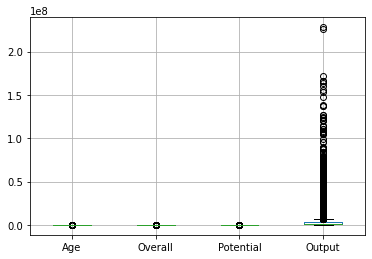

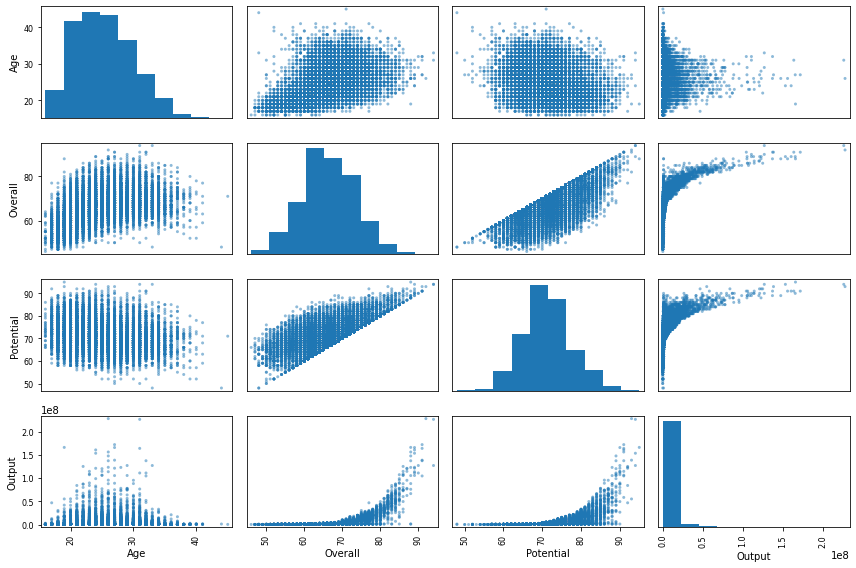

In [ ]:
##datos procesados
from pandas.plotting import scatter_matrix

Xm.boxplot()#grafica de caja
plt.show()
scatter_matrix(Xm, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

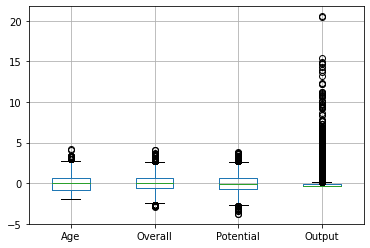

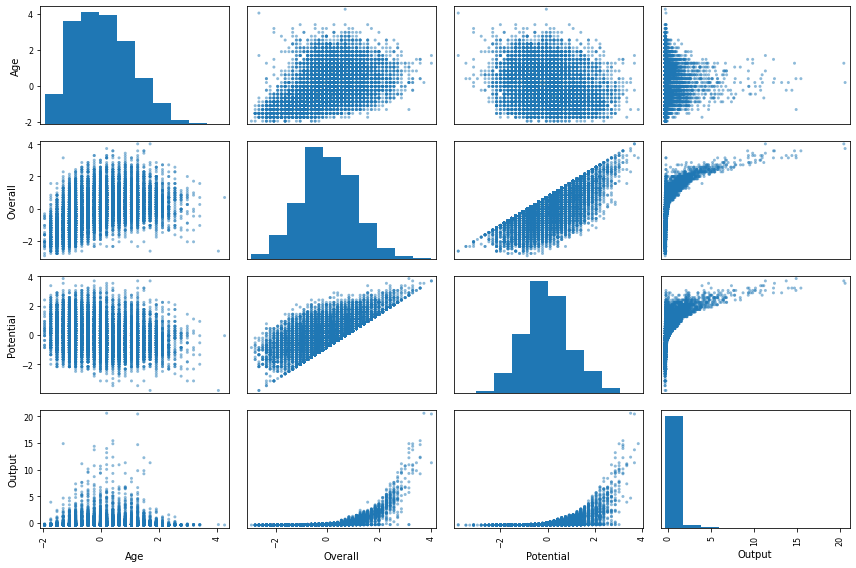

In [ ]:
###datos preprocesados más StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)
Xm_pre_sca.boxplot()#grafica de caja
plt.show()
scatter_matrix(Xm_pre_sca, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

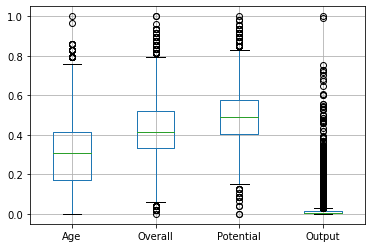

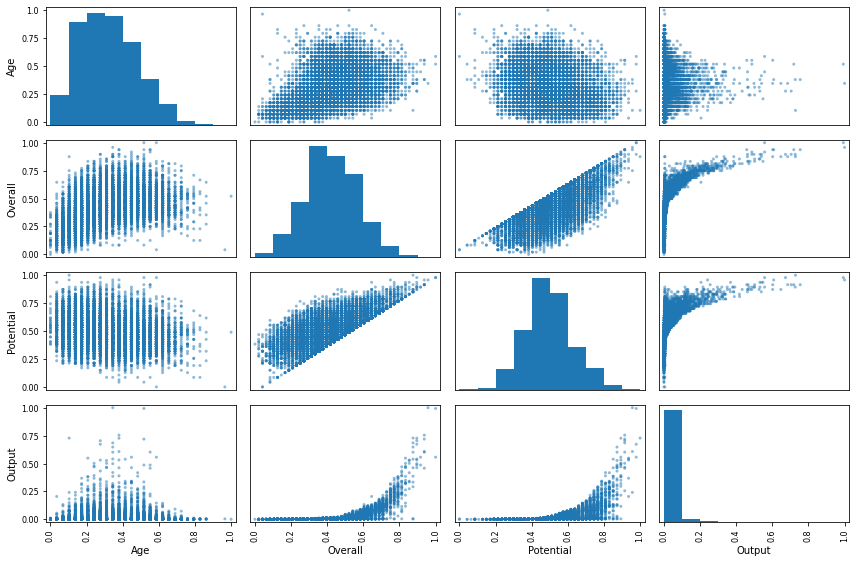

In [ ]:
####datos preprocesados más MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)
Xm_pre_sca.boxplot()#grafica de caja
plt.show()
scatter_matrix(Xm_pre_sca, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()


# Se define pipeline para entrenar un modelo de regresión

**Nota:** Se sugiere utilizar un preproceso de normalización tipo StandardScaler o MinMaxScaler para evitar problemas de escala a la hora de identificar los patrones de interés.


A continuación se genera pipeline completo inlcuyendo preproceso custom, standardscaler y modelo de regresión lineal por mínimos cuadrados.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
steps = [('preproceso',mypre_fifa(col_euro=col_euro,col_stats=col_stats,cat_usr = cat_usr)), 
         ('scaler', StandardScaler()),
         ('regresion',LinearRegression())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full.fit(Xtrain,ytrain_num) #entrena todos los pasos

Pipeline(steps=[('preproceso',
                 mypre_fifa(cat_usr={'Body Type': ['Normal', 'Lean', 'Stocky',
                                                   'Messi', 'C. Ronaldo',
                                                   'Neymar', 'Courtois',
                                                   'PLAYER_BODY_TYPE_25',
                                                   'Shaqiri', 'Akinfenwa'],
                                     'Club': ['FC Barcelona', 'Valencia CF',
                                              'Fortuna Düsseldorf',
                                              'Cardiff City', 'Rayo Vallecano',
                                              'CD Leganés', 'Frosinone',
                                              'Newcastle United', 'Southampton',
                                              'Burnley', 'Eintracht Frankfurt',
                                              'Wolve...
                                     'Work Rate': ['Medium/ Medium',
         

In [ ]:
ytest_e = metodo_full.predict(Xtest) #se evalua el desempeño en el conjunto de test


Se grafican salida original y las predicciones

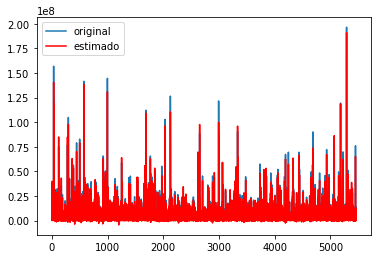

In [ ]:
plt.plot(ytest_num,label='original')
plt.plot(ytest_e,'r',label='estimado')

plt.legend()
plt.show()

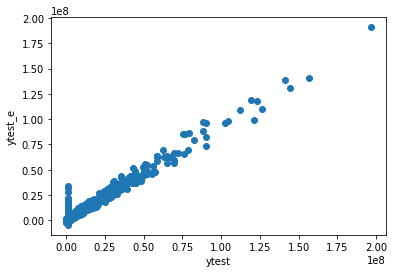

In [ ]:
plt.scatter(ytest_num,ytest_e)
plt.xlabel('ytest')
plt.ylabel('ytest_e')
plt.show()

# Ejercicio 3

1. Utilizando el método steps del pipeline, realice una gráfica de las cargas (pesos) del modelo lineal entrenado. Qué puede discutir al respecto?

2. Consulte y presente el modelo y problema de optimización de los siguientes regresores:

 - [LinearRegresor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
 - [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
 - [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
 - [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)
 - [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
 - [BayesianRidge](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression)

3. Utilizando un esquema de validación cruzada de 5 folds sobre el conjunto de entrenamiento preprocesado, compare el rendimiento en el conjunto de test de los regresores del punto 2. fijando el score del [gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) en términos del error absoluto medio y el error cuádratico medio. Justifique los hiperparámetros a buscar y la rejilla de valores escogida para cada algoritmo según los modelos estudiados en clase y las respuestas del punto 2. Para el caso del kernelRidge se sugiere trabajar sobre un conjunto de train de 5000 puntos para evitar problemas de memoría en los cálculos de la matriz kernel (presente los resultados para kernel ridge utilizando una función rbf).



#Respuestas
#Punto 1

In [ ]:
metodo_full.steps[2][1].coef_.shape

(81,)

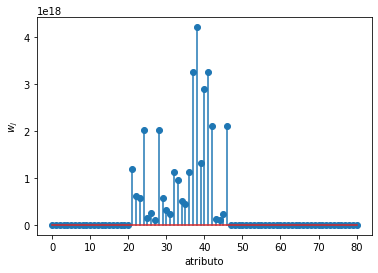

In [ ]:
#Ayuda punto 1:
#el pipeline contiene el método steps codificando los elementos del proceso. 
#En este caso el regresor esta en la posición 2 y en la 1 de la tupla arrojada
#Revisando la documentación de LinearRegression, el atributo coef_ contiene las cargas del modelo
plt.stem(abs(metodo_full.steps[2][1].coef_))
plt.xlabel('atributo')
plt.ylabel('$w_j$')
plt.show()

Observamos que son muy pocos los atributos que tuvieron mayor relevancia al entrenar el modelo

#Punto 2


-  **Linear Regressor:** La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal por medio de coeficientes o estimadores $\omega = (\omega_1 , ...,\omega_p )$, estos últimos tienen como finalidad minimizar el error cuadrático medio entre el valor real observado y el estimado. \\

- **La variable modelada** se conoce como variable respuesta y a las variables independientes como regresores o predictores. \\

- **Su modelo matemático es**: \\

\begin{aligned}
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1P} \\
x_{21} & x_{22} & \cdots & x_{2P} \\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{NP}
\end{bmatrix} & \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_P \end{bmatrix} =& \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} 
\end{aligned}

$$\mathbf{X}\omega = \mathbf{\hat{y}}$$
por lo tanto 
- X: Matriz con N muestras y P atributos.
- $\hat{y}$: Salida estimada. \\

El objetivo es encontrar el vector de pesos **w** pero, a dicha expresión no se le puede aplicar la inversa de **X** porque no existe, entonces, no es tan simple hallar **w**. Por tanto, es necesario usar la pseudo inversa de Moore Penrose la cual permite dar solucion a este sistema.
$$\omega^* = \arg\min_\omega \|\mathbf{y} - \mathbf{X}\omega\|^2_2$$
De lo anterior se interpreta como el nuevo **w*** debe hacer que el error cuadrático medio entre el valor real y el estimado de la variable de salida sea lo más pequeño posible. El nuevo **W*** será igual a: \\

$$\omega^* = (X^{t}X)^{-1}X^{t}y$$

Este modelo de regresión permite estimar una variable de forma lineal, tiene como condición que cada uno de los atributos de cada muestra, depende la independencia lineal entre ellos. Si llegase el caso a que existe entre si una correlación, la salida estimada va a presentar una mayor varianza y error respecto al valor real. \\
* **Lasso:** La regularización Lasso penaliza la suma del valor absoluto de los coeficientes de regresión ($||\omega||_{1}=∑_{j=1}^{p}|\omega_j|$). A esta penalización se le conoce como L1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. \\
Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue excluir los predictores menos relevantes.
$$\sum_{i = 1}^{n}(y_i-\omega_0-\sum_{j = 1}^{p}(\omega_j \cdot x_{ij}))^2+\alpha\sum_{j = 0}^{p}|\omega_j|$$

Lasso ayuda a evitar el sobreajuste del modelo y también a seleccionar las características al utilizar norma $L_1$ por medio de $\lambda$. \\

- **Elastic Net:** es un modelo de regresión lineal entrenado con regularización de los coeficientes que combina la penalización $L_1$ y $L_2$. Esta combinación permite aprender un modelo escaso donde pocos de los pesos son distintos de cero como Lasso, manteniendo al mismo tiempo las propiedades de regularización de Ridge.

- La función a minimizar es: \\

$$\min_\omega \frac{1}{2n_{muestras}}||X\omega−y||^2_2+\lambda\alpha||\omega||_1 + \frac{\lambda(1-\alpha)}{2}||\omega||^2_2$$ \\
El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro α. Su valor está comprendido en el intervalo [0,1]. Cuando α=0, se aplica ridge y cuando α=1 se aplica lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización $L_1$ (α muy próximo a 1) para conseguir seleccionar predictores y un poco a la L2 para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados. \\

Elastic-net es útil cuando hay múltiples características que están correlacionadas entre sí. Es probable que Lasso elija uno de estos al azar, mientras que elastic-net es probable que elija ambos. \\

- **Kernel Ridge:** combina la regresión de Ridge (mínimos cuadrados lineales con regularización de la norma $L_2$) con el truco del núcleo. Aprende así una función lineal en el espacio inducida por el núcleo respectivo y los datos. Para núcleos no lineales, esto corresponde a una función no lineal en el espacio original. \\

Al reemplazar la matriz de datos (con sus atributos): $x_i → \Phi_i = \Phi (x_i)$.

Donde  $\Phi$ es la función base generada a partir de la kernel function $k(x,x') $ cuya salida es máxima cuando $x=x'$ y decrece a medida que la distancia $||x -x'||$ incrementa. \\

Su modelo matemático es: \\

$$y = \Phi (x_i) \omega$$

Donde: \\

$$\omega^* = (\Phi \Phi^{t} + λ I)^{-1} \Phi^{t}y$$

- **SGD Regressor:** Modelo lineal ajustado minimizando una pérdida empírica regularizada con SGD.

Implementa una rutina de aprendizaje de SGD simple que admite diferentes funciones de pérdida y penalizaciones para adaptarse a los modelos de regresión lineal. SGDRegressor es adecuado para problemas de regresión con un gran número de muestras de entrenamiento (> 10.000). \\

El regularizador es una penalización añadida a la función de pérdida que reduce los parámetros del modelo hacia el vector cero utilizando la norma euclidiana al cuadrado L2 o la norma absoluta L1 o una combinación de ambas (Elastic Net). Si la actualización del parámetro cruza el valor 0.0 debido al regularizador, la actualización se trunca a 0.0 para permitir el aprendizaje de modelos dispersos y lograr la selección de características en línea. \\

La función de pérdida de hormigón se puede configurar mediante el parámetro de loss. SGDRegressor admite las siguientes funciones de pérdida:

- loss="squared_loss" : mínimos cuadrados ordinarios,
- loss="huber" : pérdida de Huber para regresión robusta,
- loss="epsilon_insensitive" : Regresión de vectores de soporte lineal.

El parámetro de penalty determina la regularización que se utilizará. \\

**Recordar:** SGD (Descenso de gradiente estocástico): es una técnica de optimización para ajustar clasificadores y regresores lineales bajo funciones de pérdida convexa como máquinas de vectores de soporte (lineales) y regresión logística. El gradiente de la pérdida se estima cada muestra a la vez y el modelo se actualiza en el camino con un programa de fuerza decreciente (también conocido como tasa de aprendizaje).

Las ventajas del SGD son:

- La eficiencia.
- La facilidad de implementación..

Las desventajas del SGD son:

- El SGD requiere una serie de hiperparámetros como el parámetro de regularización y el número de iteraciones.

- El SGD es sensible al escalamiento de las características. \\


In [ ]:
#Ayuda punto 2 y 3
#Dado que el preproceso no cambia, se sugiera generar el pipeline sin mypre_fifa para ahorrar tiempo
steps = [('scaler', StandardScaler()), #ajustar según ejercicio
         ('regresion',LinearRegression()) #ajustar según ejercicio
         ]
metodo_gs = Pipeline(steps=steps) #pipeline a utilizar en el gridsearch
#Recuerde realizar el fit del gridsearch sobre las matrices de entrada y vector de salida preprocesados
#Xtrain_pre ytrain_num


#Punto 3

#Regresion Lineal 

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
#Ayuda punto 2 y 3
#Dado que el preproceso no cambia, se sugiera generar el pipeline sin mypre_fifa para ahorrar tiempo
steps = [('scaler', StandardScaler()), #ajustar según ejercicio
          ('reg',LinearRegression()) #ajustar según ejercicio
         ]

metodo_gs = Pipeline(steps=steps) #pipeline a utilizar en el gridsearch
#Recuerde realizar el fit del gridsearch sobre las matrices de entrada y vector de salida preprocesados
#Xtrain_pre ytrain_num
parameters = {'reg__positive':[True,False], } #Parámetros para LinearRegression
grid_search = GridSearchCV(metodo_gs, parameters, n_jobs=-1,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(Xtrain_pre, ytrain_num)
best_model = grid_search.best_estimator_
print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Mejores parámetros:

{'reg__positive': True}


#Lasso

In [ ]:
steps = [('scaler', StandardScaler()), #ajustar según ejercicio
          ('reg', Lasso()) #ajustar según ejercicio
         ]
metodo_gs = Pipeline(steps=steps)
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000]}
grid_search = GridSearchCV(metodo_gs, parameters, n_jobs=-1,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(Xtrain_pre, ytrain_num)
best_model = grid_search.best_estimator_
print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores parámetros:

{'reg__alpha': 1000}


#Elastic Net

In [ ]:
steps = [('scaler', StandardScaler()), #ajustar según ejercicio
          ('reg',ElasticNet()) #ajustar según ejercicio
        ]

metodo_gs = Pipeline(steps=steps)
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000], 'reg__l1_ratio':[0,0.25,0.5,0.75,1]}
grid_search = GridSearchCV(metodo_gs, parameters, n_jobs=-1,cv=5, scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(Xtrain_pre, ytrain_num)
best_model = grid_search.best_estimator_
print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Mejores parámetros:

{'reg__alpha': 0.01, 'reg__l1_ratio': 0}


#Kernel Ridge

In [ ]:
steps=[('scaler', StandardScaler()), ('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              }

metodo_gs = Pipeline(steps = steps)

grid_search = GridSearchCV(metodo_gs, parameters, n_jobs=-1,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(Xtrain_pre, ytrain_num)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits

Mejores parámetros:

{'reg__alpha': 0.1, 'reg__gamma': 0.001}


#SGD regressor

In [ ]:
steps = [('scaler', StandardScaler()), #ajustar según ejercicio
          ('reg',SGDRegressor()) #ajustar según ejercicio
         ]

metodo_gs = Pipeline(steps=steps)
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000] 
              }
grid_search = GridSearchCV(metodo_gs, parameters, n_jobs=-1,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(Xtrain_pre, ytrain_num)
best_model = grid_search.best_estimator_
print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Mejores parámetros:

{'reg__alpha': 0.001}
